<a href="https://colab.research.google.com/github/dims20015/TestGit/blob/master/ARIMA%20Model%20for%20Forecasting%20Electricity%20Bill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Residential_Average_Monthly_kWh_and_Bills.csv')
df.dropna()
df['Date']=pd.to_datetime(df['Date'])

df.head()

,Date,Average kWh,Fuel Charge (Cents/kWh),Average Bill
0,2000-01-01,820,1.372,54.26
1,2000-02-01,766,1.372,50.27
2,2000-03-01,707,1.372,45.91
3,2000-04-01,715,1.372,46.50
4,2000-05-01,838,1.372,61.68


In [ ]:
df.set_index('Date',inplace=True)
df.head()

,Average kWh,Fuel Charge (Cents/kWh),Average Bill
Date,,,
2000-01-01,820,1.372,54.26
2000-02-01,766,1.372,50.27
2000-03-01,707,1.372,45.91
2000-04-01,715,1.372,46.50
2000-05-01,838,1.372,61.68


<Axes: xlabel='Date'>

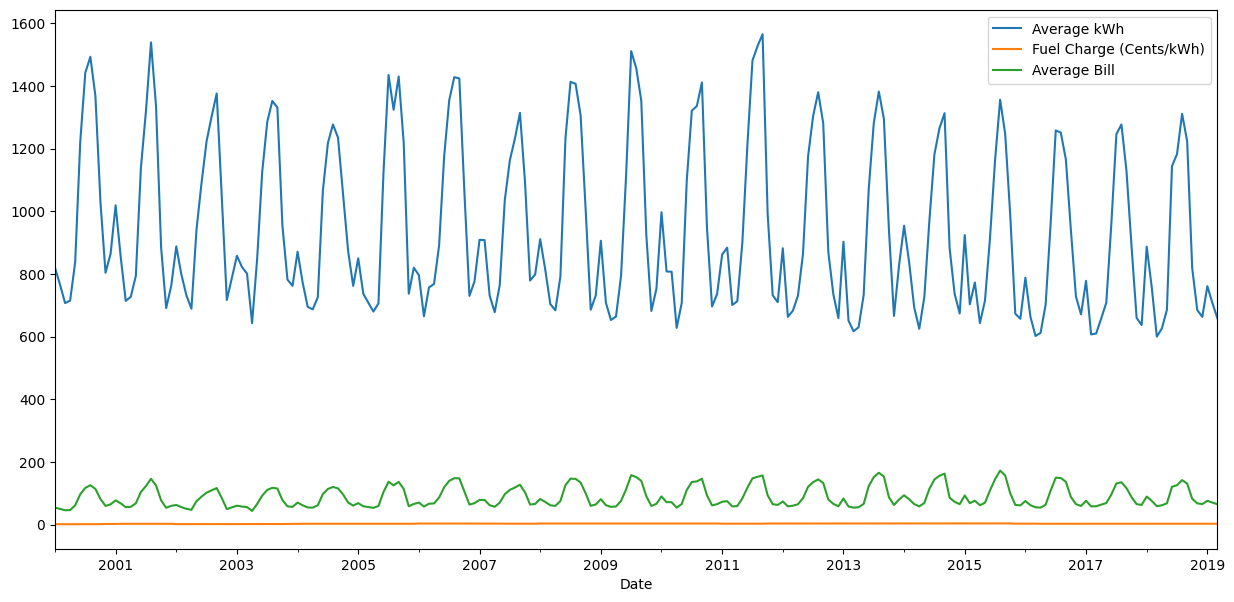

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(dataset):
    result=adfuller(dataset)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Average Bill'])

ADF Test Statistic : -2.0354897277821573
p-value : 0.2712320714772129
#Lags Used : 13
Number of Observations : 217
weak evidence against null hypothesis,indicating it is non-stationary 


In [ ]:
df['Seasonal First Difference']=df['Average Bill']-df['Average Bill'].shift(12)
df.head(14)


,Average kWh,Fuel Charge (Cents/kWh),Average Bill,Seasonal First Difference
Date,,,,
2000-01-01,820,1.372,54.26,NaN
2000-02-01,766,1.372,50.27,NaN
2000-03-01,707,1.372,45.91,NaN
2000-04-01,715,1.372,46.50,NaN
2000-05-01,838,1.372,61.68,NaN
2000-06-01,1221,1.372,96.88,NaN
2000-07-01,1442,1.372,117.20,NaN
2000-08-01,1493,1.635,125.81,NaN
2000-09-01,1368,1.635,113.99,NaN


In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.522848664583653
p-value : 0.00017876833777112327
#Lags Used : 12
Number of Observations : 206
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Date'>

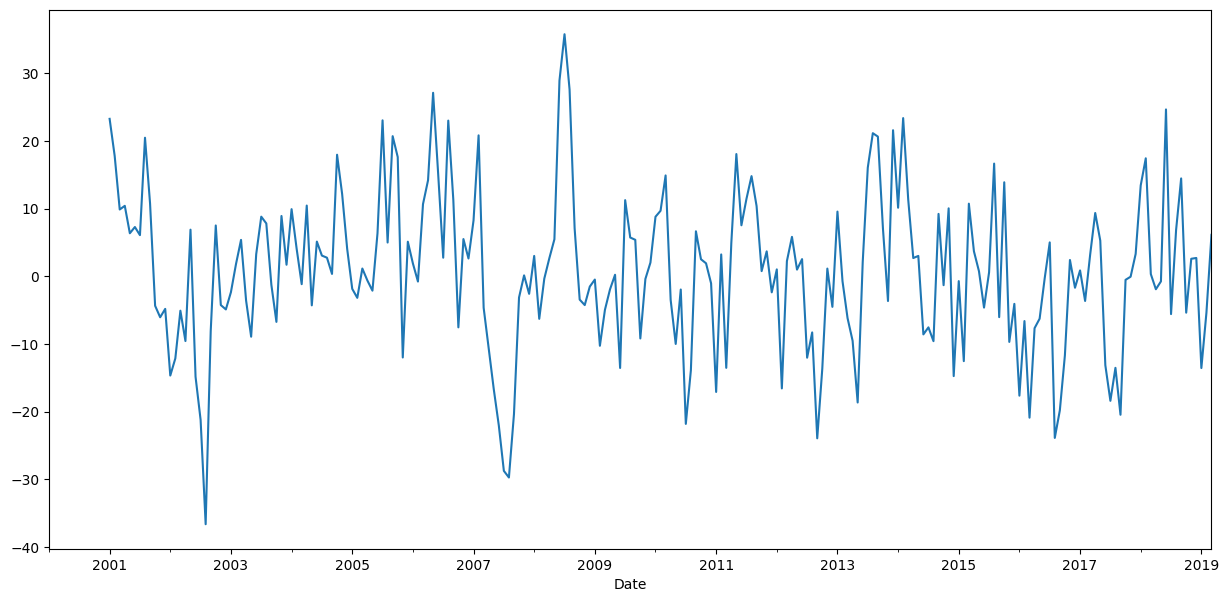

In [ ]:
df['Seasonal First Difference'].plot()

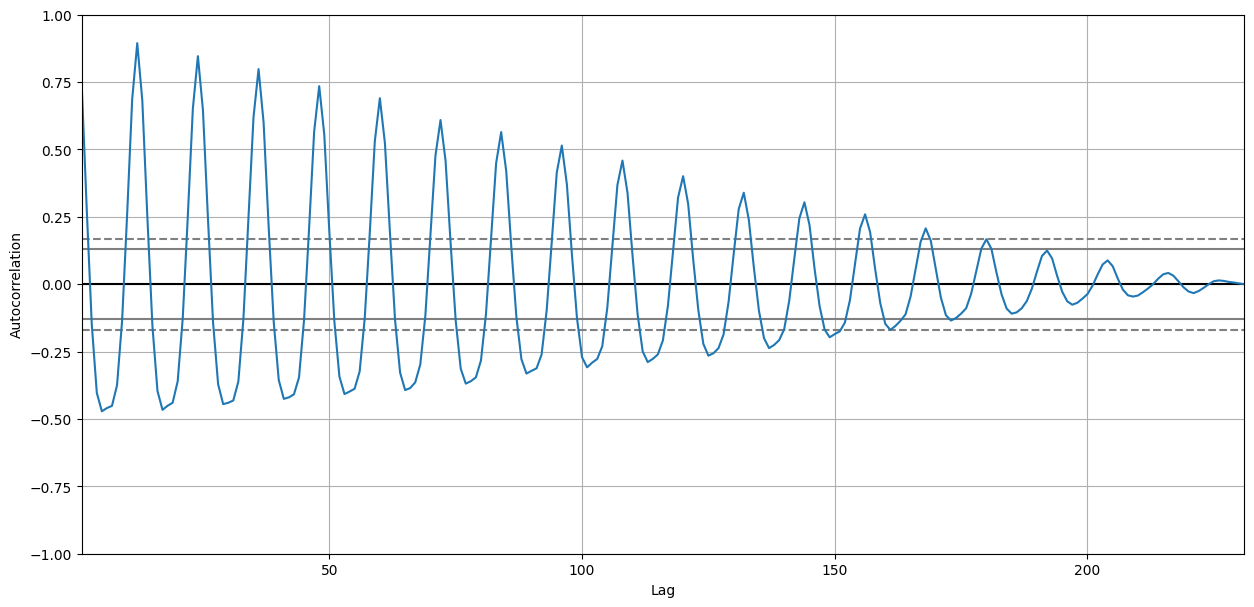

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Average Bill'])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


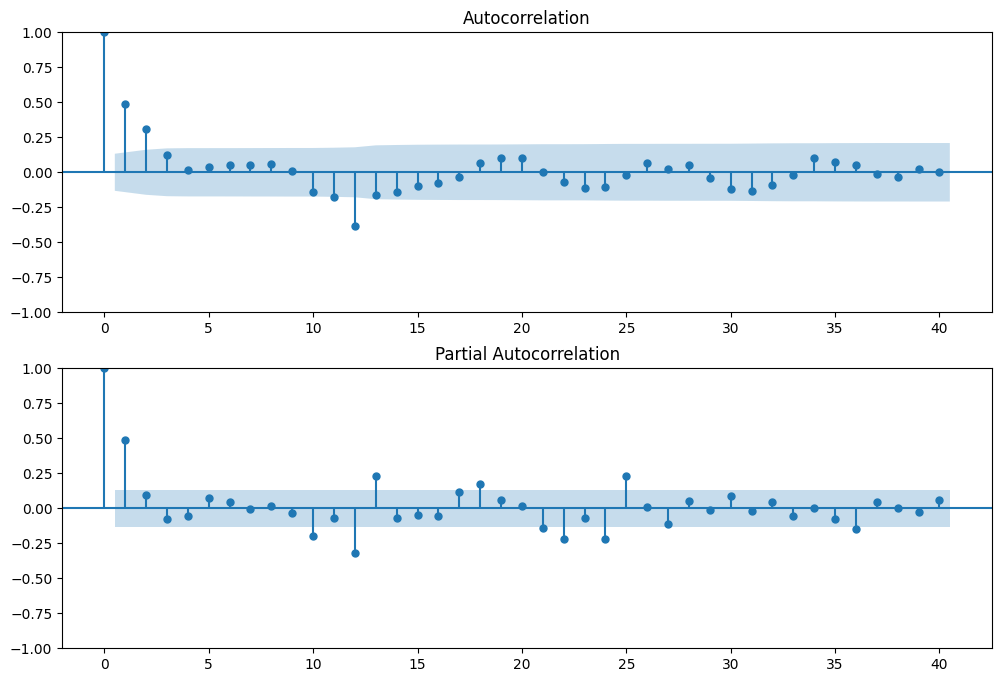

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
df.tail()

,Average kWh,Fuel Charge (Cents/kWh),Average Bill,Seasonal First Difference,forecast
Date,,,,,
2018-11-01,685,2.895,68.01,2.59,0.883627
2018-12-01,663,2.895,65.67,2.71,0.883637
2019-01-01,761,2.895,76.13,-13.55,0.883643
2019-02-01,707,2.895,70.38,-5.40,0.883647
2019-03-01,658,2.895,65.13,6.13,0.883649


In [ ]:
!pip install pmdarima

from pmdarima.arima import auto_arima

model = auto_arima(df['Seasonal First Difference'].dropna())

model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.8 MB/s eta 0:00:00


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(df['Seasonal First Difference'],order=(2,0,0))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Seasonal First Difference   No. Observations:                  231
Model:                        ARIMA(2, 0, 0)   Log Likelihood                -817.432
Date:                       Thu, 06 Apr 2023   AIC                           1642.864
Time:                               13:58:03   BIC                           1656.634
Sample:                           01-01-2000   HQIC                          1648.418
                                - 03-01-2019                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8837      1.468      0.602      0.547      -1.994       3.761
ar.L1          0.4478      0.066      6.755      0.000       0.318       0.578
ar.L2          0.0957      0.068      1.404      0.160      -0.038       0.229
sigma2       102.0932     10.518      9.706      0.000      81.478     122.709
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.99   Prob(JB):                         0.98
Heteroskedasticity (H):               1.44   Skew:                            -0.01
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

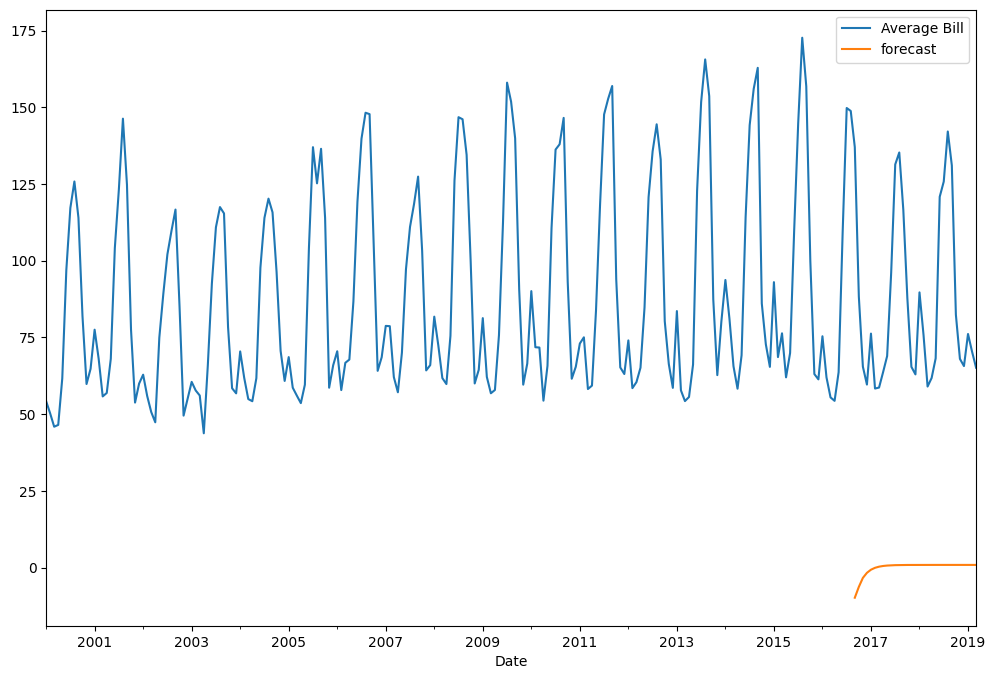

In [ ]:
df['forecast']=model_fit.predict(start=200,end=230,dynamic=True)
df[['Average Bill','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Average Bill'],order=(2, 0, 0),seasonal_order=(2,0,0,12))
results=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<Axes: >

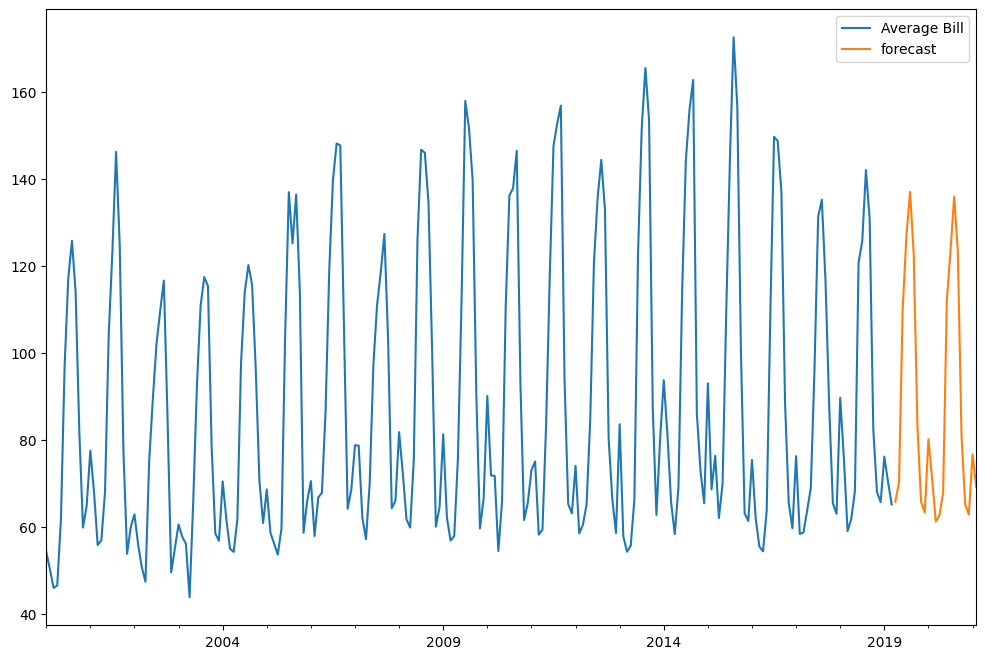

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 231, end = 300, dynamic= True)
future_df[['Average Bill', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df.tail(30)

,Average kWh,Fuel Charge (Cents/kWh),Average Bill,Seasonal First Difference,forecast
2018-09-01,1224,3.007,131.02,14.46,NaN
2018-10-01,819,2.936,82.41,-5.37,NaN
2018-11-01,685,2.895,68.01,2.59,NaN
2018-12-01,663,2.895,65.67,2.71,NaN
2019-01-01,761,2.895,76.13,-13.55,NaN
2019-02-01,707,2.895,70.38,-5.40,NaN
2019-03-01,658,2.895,65.13,6.13,NaN
2019-04-01,NaN,NaN,NaN,NaN,65.751704
2019-05-01,NaN,NaN,NaN,NaN,70.217761
2019-06-01,NaN,NaN,NaN,NaN,110.125415


In [ ]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

# train SARIMAX model
model=sm.tsa.statespace.SARIMAX(df['Average Bill'],order=(2, 0, 0),seasonal_order=(2,0,0,12))
results=model.fit()

# save model to file
with open('EBILLS.pkl', 'wb') as f:
    pickle.dump(results, f)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
df.index[-1]

Timestamp('2019-03-01 00:00:00')